# Signal Processing
## Week \#1 Lab

### Introduction

Welcome to the computational notebook that we will use in this course for studying signal processing using the Python programming language in the Jupyter Notebook environment. While Python is not the most memory efficient programming language and does not have the fastest run-time, it is free and user friendly which will allow us to explore signal processing using this popular language. The Jupyter Notebook is an open source interactive application that allows you to compine code, graphics, equations, and text. We will use the Jupyter Notebook in the lab environment inside the Coursera platform to enable easy submission of your lab work and to avoid any configuration issues that may arise on your own machine.

The purpose of this lab is to get familiar with the Jupyter Notebook envrionment in Coursera and to use Python to create and view signals in the time-domain, frequency-domain, and $z$-domain. After reviewing the concepts presented in this lab, you are required to complete the each of the lab exercises at the end of this lab. As you review the material in this lab, feel free to edit and then exceute the codes cells of the background information.

### Using Jupyter Notebook

The Jupyter Notebook consists code cells and markdown cells. Code cells contain the Python code that can be executed. Markdown cells allow for the creation of text with the Markdown language. If you are familiar with the MATLAB programing language, the notebook is similar to MATLAB's live scripts and live functions (.mlx files).

For more information on the structure and the basic workflow of a Jupyter notebook, please see the user documentation:

https://jupyter-notebook.readthedocs.io/en/latest/notebook.html#structure-of-a-notebook-document

For this course, you are required to submit work in the Jupyter Notebook within the Coursera platform. However, if you would like run your own Juypter Notebook on your machine for practice, I recommend using JupyterLab:

https://jupyter.org/

If you don't yet, have Python installed, the Anaconda distribution will ensure you have all the necessary pacakges and give you access to JupyterLab:

https://www.anaconda.com/download

### Using Python

If you are unfamliar with the Python programming language, we will introduce the key concepts necessary for each signal processing lab when needed. For a more formal introdcution, you can access a Python tutorial here:

https://docs.python.org/3/tutorial/index.html

### Install Python Packages

Before we begin each lab exercise in the Jupyter Notebook, we will will import the necessary Python modules for implementing the lab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Working With Signals in the Time-Domain

#### Create and Plot a Sinusoid
If we plot enough samples of a sinusoid, we can make it seem like a continuous-time sinusoid (eventhough it is computed with many samples).

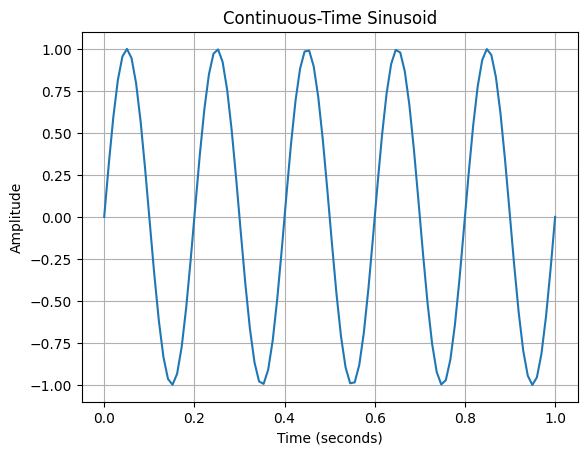

In [ ]:
# Define sinusoid
A = 1
f = 5
theta = 0
t = np.linspace(0,1,100)
x = A * np.sin(2 * np.pi * f * t +theta)

# Plot results
plt.plot(t,x)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Continuous-Time Sinusoid')
plt.grid()

#### Create and Plot a Discrete-Time Sinusoid
Usually for discrete-time signals we use a stem plot to show the amplitude value of each sample.

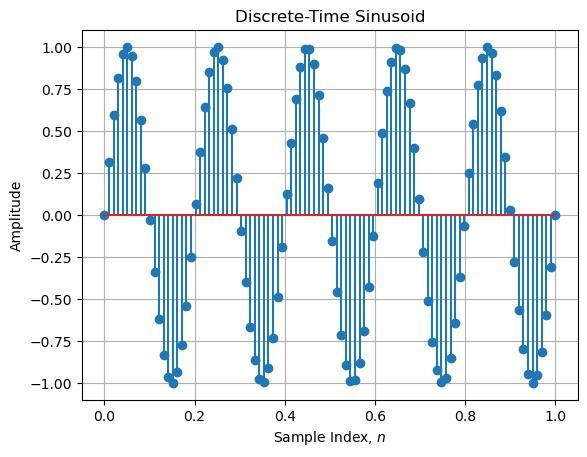

In [ ]:
# Define discrete-time sinusoid
A = 1
f = 5
theta = 0
n = np.linspace(0,1,100)
x = A * np.sin(2 * np.pi * f * n +theta)

# Plot results
plt.stem(n,x)
plt.xlabel('Sample Index, $n$')
plt.ylabel('Amplitude')
plt.title('Discrete-Time Sinusoid')
plt.grid()

#### Create and Plot the Unit Sample Sequence (impulse) and the Unit Step Sequence
The unit sample sequence, or impulse, is defined as
\begin{equation*}
\delta[n]=
\begin{cases}
0, \hspace{4mm} &n\neq 0\\
1, \hspace{4mm} &n=0
\end{cases}
\end{equation*}
The unit step sequence is defined as
\begin{equation*}
u[n]=
\begin{cases}
1, \hspace{4mm} &n\geq 0\\
0, \hspace{4mm} &n<0
\end{cases}
\end{equation*}

range(-3, 4)
[0, 0, 0, 1, 0, 0, 0]


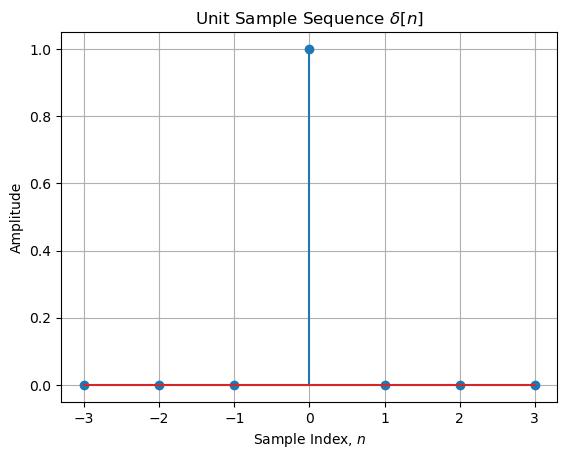

In [ ]:
# Define unit sample sequence / impulse
n = range(-3,4,1)
y = []
for i in range(len(n)):
    temp = (1 if n[i]==0 else 0)
    y.append(temp)

# Print results
print(n)
print(y)

# Plot results
plt.stem(n,y)
plt.xlabel('Sample Index, $n$')
plt.ylabel('Amplitude')
plt.title('Unit Sample Sequence $\delta[n]$')
plt.grid()

[-3, -2, -1, 0, 1, 2, 3]
[0, 0, 0, 1, 1, 1, 1]


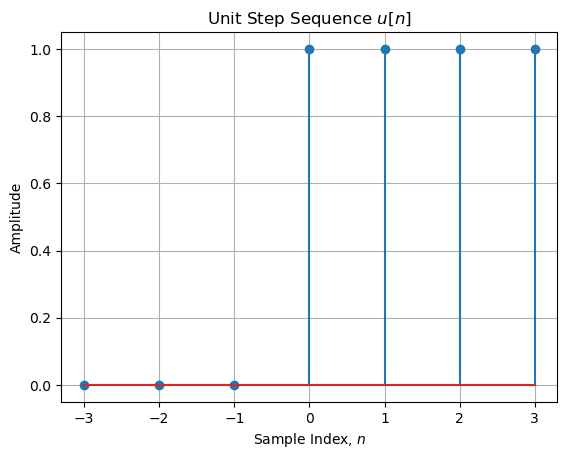

In [ ]:
# Define unit step sequence
n = range(-3,4,1)
y = []
for i in range(len(n)):
    temp = (1 if n[i]>=0 else 0)
    y.append(temp)

# Print results
print(list(n))
print(y)

# Plot results
plt.stem(n,y)
plt.xlabel('Sample Index, $n$')
plt.ylabel('Amplitude')
plt.title('Unit Step Sequence $u[n]$')
plt.grid()

#### Compute the Convolution Sum (Discrete-Time Convolution)
The convolution sum allows us to compute each sample of the output sequence, $y[n]$, of an LTI system where $x[n]$ is the input and $h[n]$ is the impulse response:
\begin{equation*}
y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]
\end{equation*}



In [ ]:
# Define input sequence and impulse response
x = np.array([1,2,4])
h = np.array([1,1,1,1,1])

# Compute the convolution sum
y = np.convolve(x,h)

# Print results to the notebook
print(y)

[1 3 7 7 7 6 4]


### Working With Signals in the Frequency-Domain

#### Plotting the Magnitude and Phase Spectrum
Taking the discrete-time Fourier transform of the signal $x(n) = u(n) - u(n-6)$, gives us the spectrum $X(\omega)$ and we can plot the magnitude and phase of the spectrum.
\begin{eqnarray*}
X(\omega) &=& \sum_{n=-\infty}^{\infty} x(n) e^{-j\omega n}\\
&=& \sum_{n=0}^{5} e^{-j\omega n}\\
&=& \sum_{n=0}^{5} \left( e^{-j\omega } \right)^n\\
&=& \frac{1-e^{-j6\omega}}{1-e^{-j\omega}}
\end{eqnarray*}

Notice how the discrete-time Fourier tranform is discrete in time and continuous in frequency. The DTFT is periodic in the frequency domain with a period of $2\pi$. In the first plot below, we can observe the periodicity in the frequency-domain and the next plot shows how we normally plot the frequency up to the highest unique frequency of $\pi$. Notice how this system behaves as a low pass filter, allowing low frequencies close to zero to pass through with higher magnitudes and higher frequencies near $\pi$ are attenuated.

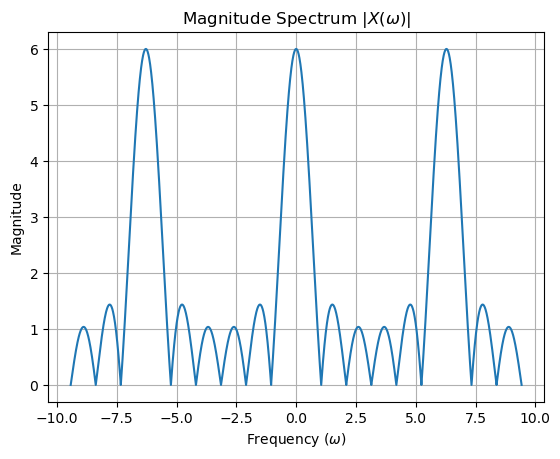

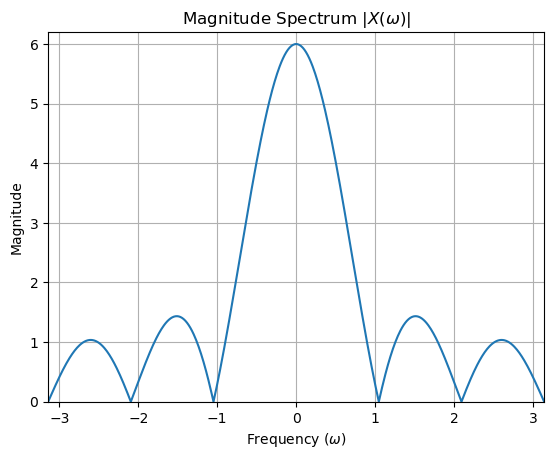

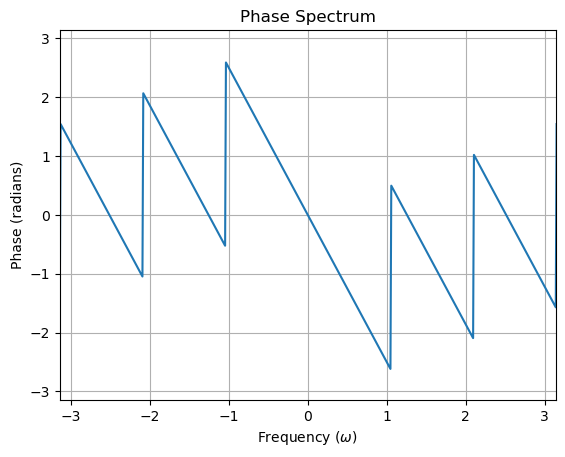

In [ ]:
# Create frequency array
w = np.arange(-3*np.pi,3*np.pi,np.pi/300)

# Compute values of Fourier transform
X = (1-np.exp(-1j*6*w))/(1-np.exp(-1j*w))
Xmag = np.abs(X)
Xangle = np.angle(X)

# Plot magnitude and phase
plt.figure(1)
plt.plot(w,Xmag)
plt.xlabel('Frequency ($\omega$)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum $|X(\omega)|$')
plt.grid()

plt.figure(2)
plt.plot(w,Xmag)
plt.axis([-np.pi, np.pi, 0, 6.2])
plt.xlabel('Frequency ($\omega$)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum $|X(\omega)|$')
plt.grid()

plt.figure(3)
plt.plot(w,Xangle)
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.xlabel('Frequency ($\omega$)')
plt.ylabel('Phase (radians)')
plt.title('Phase Spectrum')
plt.grid()

### Working With Signals in the $z$-Domain
Let's express the rational function of $z^{-1}$ below as a sum of imple factors using partial fraction expansion with the help of the the residuez function from the SciPy Python package which contains sub-package called signal that is useful for signal processing.
\begin{equation*}
X(z) = \frac{z}{3z^2-4z+1} = \frac{z^{-1}}{3 - 4z^{-1} + z^{-2}} = \frac{0+z^{-1}}{3 - 4z^{-1} + z^{-2}}
\end{equation*}

In [ ]:
b = ([0,1])
a = ([3,-4,1])
[r,p,k] = signal.residuez(b,a)
print(r)
print(p)
print(k)

[-0.5  0.5]
[0.33333333 1.        ]
[]


So therefore, we obtain:
\begin{equation*}
X(z) = \frac{\tfrac{1}{2}}{1-z^{-1}} - \frac{\tfrac{1}{2}}{1-\tfrac{1}{3}z^{-1}}
\end{equation*}

If $H(z)$ represents the system function of a causal LTI sytsem and therefore region of convergence includes the unit circle $|z| > 0.9$, then we can evaluate this function on the unit circle using the freqz function from SciPy, which results in the frequency response or transfer function $H(\omega)$:
\begin{equation*}
H(z) = \frac{1}{1-0.9z^{-1}}
\end{equation*}

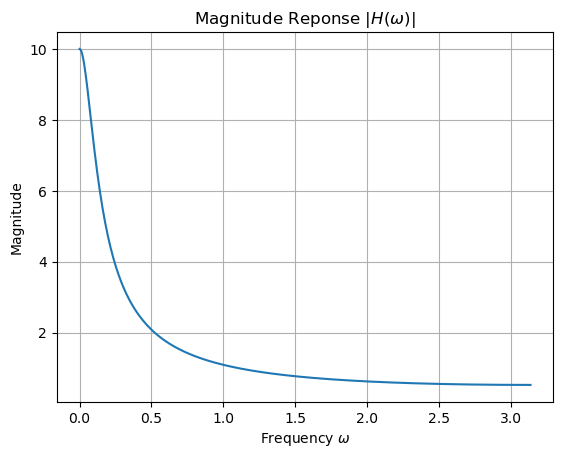

In [ ]:
# Find the frequency response
b = [1,0]
a = [1,-0.9]
[w,h] = signal.freqz(b,a)
hmag = np.abs(h)

# Plot results
plt.figure(1)
plt.plot(w,hmag)
plt.xlabel('Frequency $\omega$')
plt.ylabel('Magnitude')
plt.title('Magnitude Reponse $|H(\omega)|$')
plt.grid()

### Exercise #1
Generate the complex-valued signal $x[n] = \exp^{(-0.1+j0.3)n}$ where $-10 \leq n \leq 10$. Plot its magntiude, phase, its real part, and its imaginary part. The exponential funciton is in the NumPy package which we imported at the begining of this notebook:
https://numpy.org/doc/stable/reference/generated/numpy.exp.html

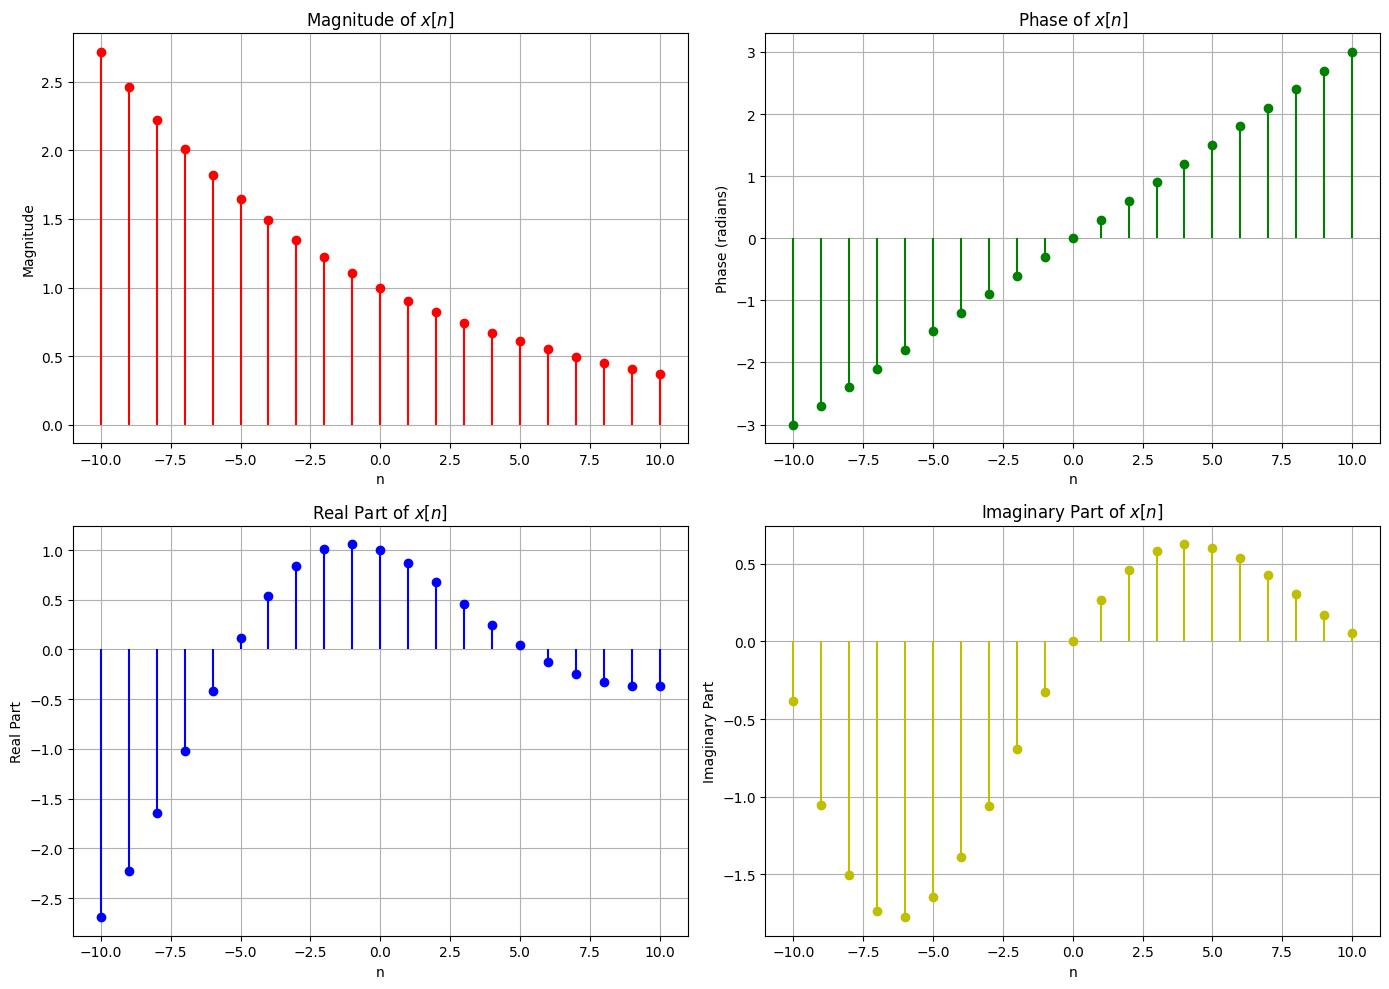

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Signal generation
n = np.arange(-10, 11)  # n from -10 to 10
x = np.exp((-0.1 + 1j*0.3) * n)

# Plotting
plt.figure(figsize=(14, 10))

# Magnitude
plt.subplot(2, 2, 1)
plt.stem(n, np.abs(x), 'r', markerfmt='ro', basefmt=" ")
plt.title('Magnitude of $x[n]$')
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.grid(True)

# Phase
plt.subplot(2, 2, 2)
plt.stem(n, np.angle(x), 'g', markerfmt='go', basefmt=" ")
plt.title('Phase of $x[n]$')
plt.xlabel('n')
plt.ylabel('Phase (radians)')
plt.grid(True)

# Real Part
plt.subplot(2, 2, 3)
plt.stem(n, x.real, 'b', markerfmt='bo', basefmt=" ")
plt.title('Real Part of $x[n]$')
plt.xlabel('n')
plt.ylabel('Real Part')
plt.grid(True)

# Imaginary Part
plt.subplot(2, 2, 4)
plt.stem(n, x.imag, 'y', markerfmt='yo', basefmt=" ")
plt.title('Imaginary Part of $x[n]$')
plt.xlabel('n')
plt.ylabel('Imaginary Part')
plt.grid(True)

plt.tight_layout()
plt.show()



#### Discussion

The signal $x[n] = e^{(-0.1+j0.3)n}$ exemplifies key principles of complex-valued signals in discrete time:

1. **Magnitude** $(e^{-0.1n})$ reveals an exponential decay, dictated by the real part of the exponent.
2. **Phase** $(0.3n)$ displays a linear relationship, indicative of constant frequency.
3. **Real and Imaginary Parts** show decaying oscillations, modulated by $\cos(0.3n)$ and $\sin(0.3n)$ respectively, showcasing the interplay between decay and oscillatory behavior.

#### Observations from Results

- The **magnitude plot** directly reflects exponential decay, aligning with $e^{-0.1n}$'s expected behavior.
- The **phase plot**'s linear trend corroborates the theoretical constant phase progression.
- Both **real and imaginary plots** depict oscillations under exponential decay, mirroring the combined effects of the signal's real and imaginary components in theory.


### Exercise #2
Compute and plot the convolution, $y[n]=x[n]*h[n]$ of the following two sequences:
\begin{equation*}
x=\{3,11,7,\underset{\uparrow}{0},-1,4,2\} \hspace{4mm} -3 \leq n \leq 3
\end{equation*}
\begin{equation*}
x=\{2,\underset{\uparrow}{3},0,-5,2,1\}\hspace{4mm} -1 \leq n \leq 4
\end{equation*}
Note that the Numpy convolv function computes the convolution of two finite-length sequences but does not provide nor accept timing information. However, you can determine the begining and end point of $y[n]$. If $x[n]$ begins as $n_{xb}$ and ends at $n_{xe}$ and $h[n]$ begins as $n_{hb}$ and ends at $n_{hb}$ then the beginning and end points of the convolution, $y[n]$, are:
\begin{equation*}
n_{yb} = n_{xb} + n_{hb}
\end{equation*}
\begin{equation*}
n_{ye} = n_{xe} + n_{he}
\end{equation*}

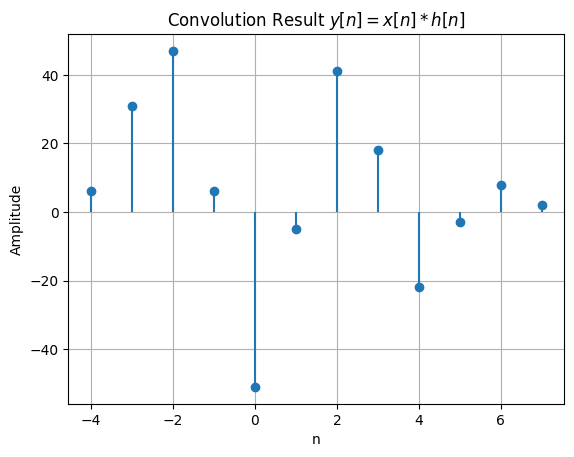

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define sequences
x = np.array([3, 11, 7, 0, -1, 4, 2])
h = np.array([2, 3, 0, -5, 2, 1])
n_x = np.arange(-3, 4)  # Time index for x
n_h = np.arange(-1, 5)  # Time index for h

# Compute convolution
y = np.convolve(x, h)
n_y = np.arange(n_x[0] + n_h[0], n_x[-1] + n_h[-1] + 1)  # Time index for y

# Plotting
plt.stem(n_y, y, basefmt=" ")
plt.title('Convolution Result $y[n] = x[n] * h[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


#### Discussion


We know that convolution in discrete time combines two sequences to form a third sequence, representing the amount of overlap between $x[n]$ and an inverted, shifted version of $h[n]$. Theoretically, it is a summation of products of the two sequences for all shifts of $h[n]$ over $x[n]$.

- **Analytic Approach**:  The starting point $n_{y b}$ of the resulting sequence $y[n]$ can be theoretically determined by adding the start points of $x[n]$ and $h[n]$, while the end point $n_{y e}$ is the sum of their end points. This aligns with the range of $n_y$ used in plotting.

- **Expectations vs. Results**: The plot of $y[n]$ visualizes the convolution operation's outcome, reflecting the theory's prediction about the impact of combining $x[n]$ and $h[n]$. The resulting sequence's length and shape are consistent with the convolution theorem, which suggests the length of $y[n]$ should be $N+M-1$, where $N$ and $M$ are the lengths of $x[n]$ and $h[n]$, respectively.


### Exercise #3
Determine the discrete-time Fourier transform of the signal, $x[n] = (1/4)^n u[n+4]$, and plot the magnitude and phase spectrum.

***SOLUTION***
\begin{eqnarray*}
X(\omega) &=& \sum_{n=-\infty}^{\infty} x(n) e^{-j\omega n}\\
&=&  \sum_{n=-4}^{\infty} (1/4)^n e^{-j\omega n} \\
 &&\mbox{let } m = n+4 \mbox{ and therefore} n=m-4\\
 &=&  \sum_{m=0}^{\infty} (1/4)^{m-4} e^{-j\omega (m-4)}\\
 &=&  4^4 e^{j4\omega} \sum_{m=0}^{\infty} (1/4)^{m} \left( e^{-j\omega}\right)^m\\
 &=& \frac{4^4 e^{j4\omega}}{1-\frac{1}{4} e^{-j\omega }}
\end{eqnarray*}


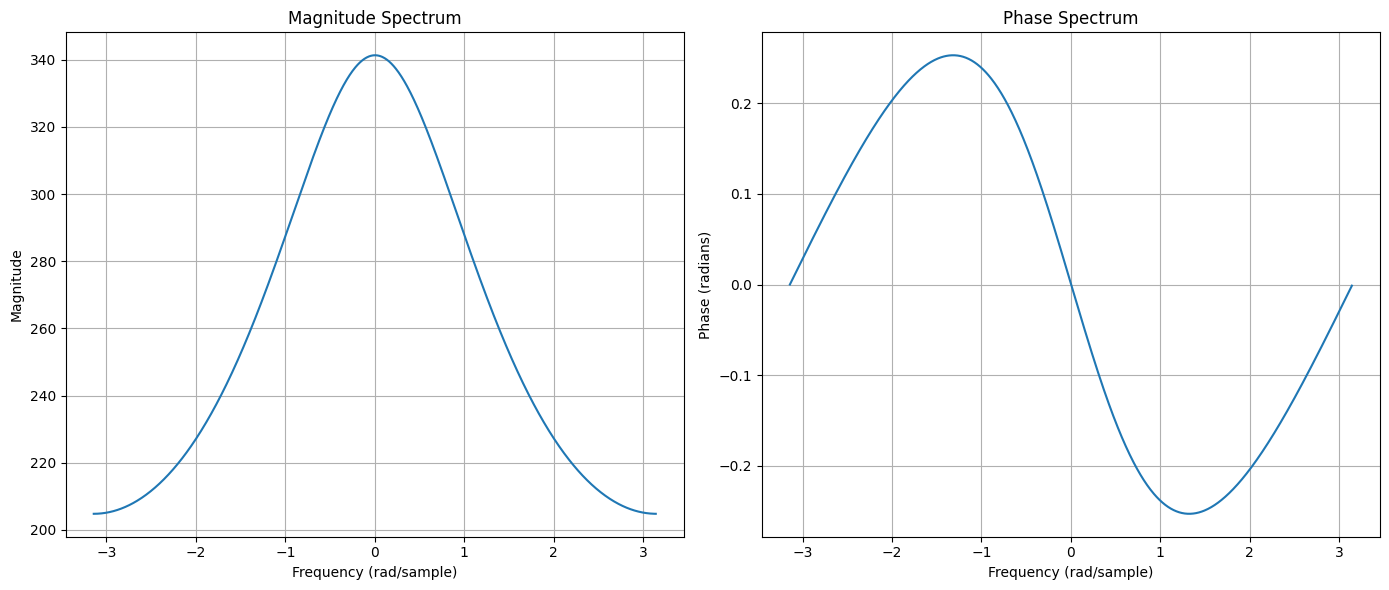

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal
n = np.arange(-4, 50)  # Extended range for better frequency resolution
x = (1/4)**n  # Signal definition

# Compute DTFT (approximation via DFT)
w = np.linspace(-np.pi, np.pi, 1000)  # Frequency range
X = np.fft.fftshift(np.fft.fft(x, 1000))  # FFT for approximation, fftshift to center frequency

# Magnitude and Phase
X_mag = np.abs(X)  # Magnitude
X_phase = np.angle(X)  # Phase

# Plotting
plt.figure(figsize=(14, 6))

# Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.plot(w, X_mag)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid()

# Phase Spectrum
plt.subplot(1, 2, 2)
plt.plot(w, X_phase)
plt.title('Phase Spectrum')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.show()


#### Theoretical Background and Discussion

The signal $x[n]=\left(\frac{1}{4}\right)^n u[n+4]$ shows an exponentially decaying behavior starting from $n=$ -4 . When computing its DTFT, we anticipate observing a spectrum that indicates how its frequency content decays over time.

- **Magnitude Spectrum**:  Theoretically, since the signal decays over time, its magnitude spectrum should show that it is composed predominantly of low frequencies, with a peak around $\omega=0$ indicating a DC component or very low-frequency content due to its slow-changing nature.

- **Phase Spectrum**: The phase spectrum will reveal the phase relationship of the signal components at different frequencies. Given the nature of $x[n]$, which is real and positive for $n \geq-4$, we expect a phase that starts near zero for low frequencies and varies smoothly across the frequency range.

### Exercise #4
Complete example 3.10 from the textbook: Find the partial fraction exapansion of the following $z$-transform using the residuez function:
\begin{equation*}
X(z) = \frac{1 + 2z^{-1} + z^{-2}}{1-\tfrac{3}{2}z^{-1}+\tfrac{1}{2}z^{-2}}
\end{equation*}


***SOLUTION***
\begin{equation*}
X(z) = 2 - \frac{9}{1-\tfrac{1}{2}z^{-1}} + \frac{8}{1-z^{-1}}
\end{equation*}

In [ ]:
from scipy import signal

# Coefficients of X(z)
num = [1, 2, 1]  # Numerator coefficients
den = [1, -1.5, 0.5]  # Denominator coefficients

# Partial fraction expansion
r, p, k = signal.residuez(num, den)

# Display results
print("Residues:", r)
print("Poles:", p)
print("Direct Terms:", k)


Residues: [-9.  8.]
Poles: [0.5 1. ]
Direct Terms: [2.]




#### Theoretical Background and Discussion

- **Residues**  $(r)$ represent the system's response's amplitude for each pole's associated frequency. In signal processing, they help in understanding how each component of the system response contributes to the overall output.

- **Poles** $(p)$ are critical in determining the system's stability and frequency response. A system is stable if all poles lie inside the unit circle in the $z$-plane $(|z|<1)$.

- **Direct Terms** $(k)$ arise if the $z$-transform's numerator degree is greater than or equal to the denominator's. In many practical cases, especially for causal systems, this term is absent or zero.

